## Pré-processamento de Dados

Nesta seção, os dados são carregados e pré-processados para análise posterior. Os dados são limpos, transformados e as características necessárias são extraídas.

In [2]:
#retirar warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

#label encoding
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#importando decision tree
from sklearn.tree import DecisionTreeClassifier

# Importando bibliotecas necessárias
import xgboost as xgb

In [3]:
df = pd.read_excel("./Dados/Fonte dos Dados.xlsx")

df_alunos = pd.read_excel("./Dados/Dados_Projeto_-_Alunos_Sirius.xlsx")

In [4]:
df_alunos['Cidade'] = df_alunos['Cidade'].str.lower()

df['nomeLocalidade'] = df['nomeLocalidade'].str.lower()

In [5]:
# check the values of each row for each column
n = df_alunos.nunique(axis=0)
print("Nº de valores unicos em cada coluna :\n",
      n)

Nº de valores unicos em cada coluna :
 Naturalidade                      46
Cidade                            36
Últimos estudos - Dados gerais    65
Escolaridade                       2
Situação do aluno                  3
FormaIngresso                      1
estado                            11
dtype: int64


## Análise Exploratória

Uma rápida olhada nos dados para entender sua estrutura, características e relações.

In [6]:
df[df['estado']=='Goiás'].head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
882,abadia de goiás,Goiás,6876,46.85,43.27,50.86,5.88,72.46,33.98,67.23,22.68,10.09,0.00,7.252165e+07,1224,392,0,0.3,1.4,13.6,0.57,0.00,6.18,0.83,13.45,0.0,0.0,0.00,4.52,38.06,57.42,6.50,30.32,37.09,976.46,2073776.12,12.03,5.03,21.67,1.45
883,abadiânia,Goiás,15757,15.08,42.08,50.82,7.11,65.39,58.96,66.61,26.79,6.60,7.77,1.331158e+08,2412,749,0,0.2,5.2,10.9,0.00,0.31,8.45,0.84,11.82,0.0,0.0,12.06,17.58,15.15,67.27,12.33,17.02,39.54,775.14,1802424.49,6.20,3.52,29.64,0.00
884,acreúna,Goiás,20279,12.95,42.05,51.41,6.54,87.08,7.87,66.18,25.74,8.08,0.18,2.992978e+08,3865,1068,0,0.2,5.7,13.3,0.10,0.00,8.08,0.82,6.32,0.0,0.0,1.48,9.36,11.33,79.31,28.76,13.23,31.48,1093.75,3064670.35,15.12,8.32,20.12,0.99
885,adelândia,Goiás,2477,21.47,37.95,52.52,9.53,88.35,0.00,67.60,24.27,8.13,2.08,2.022954e+07,417,155,0,0.0,6.5,11.5,0.00,0.00,10.89,0.84,1.37,0.0,0.0,0.00,0.00,30.77,69.23,16.44,49.32,26.03,590.79,1725872.34,11.51,8.56,4.84,0.00
886,água fria de goiás,Goiás,5090,2.51,43.38,50.49,6.13,41.00,0.00,71.99,23.34,4.68,0.13,1.180925e+08,1037,231,0,0.0,2.6,7.2,0.00,0.00,23.68,0.82,9.34,0.0,0.0,0.00,40.63,3.13,56.25,51.97,1.17,11.82,977.58,5101812.69,11.55,5.70,5.89,0.00


## Análise Exploratória

Uma rápida olhada nos dados para entender sua estrutura, características e relações.

In [7]:
df.columns

Index(['nomeLocalidade', 'estado', 'População residente',
       'Densidade demográfica', 'Porcentagem de Jovens',
       'Porcentagem de Ativos', 'Porcentagem de Idosos', 'Taxa de Urbanização',
       'Taxa de Saneamento Básico', 'Ativos com Baixo Nível Educacional',
       'Ativos com Médio Nível Educacional',
       'Ativos com Alto Nível Educacional',
       'Percentual de estrangeiros ao total de Trabalhadores', 'PIB Municipal',
       'Estudantes Ensino primário', 'Estudantes Ensino secundário',
       'Estudantes Ensino superior',
       'Óbitos até 1 ano de idade por milhares de habitantes',
       'Óbitos por milhares de habitantes',
       'Nascidos por milhares de habitantes',
       'Hospitais por milhares de habitantes',
       'Médicos por milhares de habitantes', '% de pobres', 'IDH',
       'Percentual de trabalhadores especializados',
       'Valores de Importação por 10,000 habitantes',
       'Valores de Exportação por 10,000 habitantes',
       'Número de hotéis por

In [8]:
# Agrupando por Cidade e Estado e contando a frequência
cidade_estado_counts = df_alunos.groupby(['Cidade', 'estado']).size().reset_index(name='quantidade de alunos')

# Renomeando as colunas para facilitar o merge posteriormente
cidade_estado_counts = cidade_estado_counts.rename(columns={'Cidade': 'nomeLocalidade'})

# Adicionando uma coluna com 'Sim' ou 'Não' com base na quantidade de alunos
cidade_estado_counts['Cidade tem Aluno'] = ['Sim' if x >= 1 else 'Não' for x in cidade_estado_counts['quantidade de alunos']]

cidade_estado_counts

,nomeLocalidade,estado,quantidade de alunos,Cidade tem Aluno
0,americana,São Paulo,1,Sim
1,anápolis,Goiás,1,Sim
2,assis,São Paulo,1,Sim
3,balneário camboriú,Santa Catarina,1,Sim
4,barretos,São Paulo,1,Sim
5,belo horizonte,Minas Gerais,12,Sim
6,bragança paulista,São Paulo,1,Sim
7,brasília,Distrito Federal,3,Sim
8,campinas,São Paulo,5,Sim
9,campo grande,Mato Grosso do Sul,2,Sim


In [9]:
# Usando as colunas 'nomeLocalidade' e 'estado' para realizar o merge
df_merged = df.merge(cidade_estado_counts, on=['nomeLocalidade', 'estado'], how='left')

In [10]:
#df_merged = df.merge(df_cidade_counts, on='nomeLocalidade', how='left')
df_merged['Cidade tem Aluno'] = df_merged['Cidade tem Aluno'].fillna('Não')

In [11]:
df_merged['Cidade tem Aluno'].value_counts()

Não    5529
Sim      36
Name: Cidade tem Aluno, dtype: int64

In [12]:
# Seus dados e rótulos
X = df_merged.drop(['Cidade tem Aluno','quantidade de alunos','nomeLocalidade', 'estado'], axis=1)  # Dados sem a coluna alvo
y = df_merged['Cidade tem Aluno']  # Somente a coluna alvo

le = LabelEncoder()
y = le.fit_transform(y)


## Balanceamento dos Dados

Nesta seção, estamos balanceando os dados usando SMOTE (Synthetic Minority Over-sampling Technique).

Desbalanceamento de classes é uma ocorrência comum em muitos conjuntos de dados do mundo real. Em tais situações, uma classe tem muitas mais amostras do que a outra. Isso pode criar um desafio, especialmente em tarefas de classificação, pois os modelos podem ser inclinados a favorecer a classe majoritária, resultando em uma classificação inadequada da classe minoritária.

O SMOTE é uma das técnicas mais populares para tratar desbalanceamentos de classe. Ele funciona criando "exemplos sintéticos" da classe minoritária.

In [13]:
#fazer oversampling usando smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3, random_state=88)
X, y = smote.fit_resample(X, y)

In [14]:
counts = np.bincount(y)

count_0 = counts[0]
count_1 = counts[1]

print(f"Contagem de 0: {count_0}")
print(f"Contagem de 1: {count_1}")


Contagem de 0: 5529
Contagem de 1: 5529


In [15]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Treinamento do Modelo

Nesta seção, o modelo de machine learning é treinado usando os dados. Isso inclui a divisão dos dados, a seleção do modelo, o treinamento e a otimização dos parâmetros.

In [16]:
'''# Definindo os parâmetros que você quer otimizar
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8, 0.9]
}

# Criando o modelo XGBoost
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, eval_metric="logloss", use_label_encoder=False)'''

'# Definindo os parâmetros que você quer otimizar\nparam_grid = {\n    \'n_estimators\': [100, 200, 500],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'max_depth\': [3, 4, 5],\n    \'colsample_bytree\': [0.7, 0.8],\n    \'subsample\': [0.7, 0.8, 0.9]\n}\n\n# Criando o modelo XGBoost\nxgb_estimator = xgb.XGBClassifier(objective=\'binary:logistic\', n_jobs=-1, eval_metric="logloss", use_label_encoder=False)'

In [17]:
'''# GridSearch
grid_search = GridSearchCV(estimator=xgb_estimator, param_grid=param_grid, 
                       cv=5, scoring='accuracy', verbose=1)'''

"# GridSearch\ngrid_search = GridSearchCV(estimator=xgb_estimator, param_grid=param_grid, \n                       cv=5, scoring='accuracy', verbose=1)"

In [18]:
'''# Treinando o GridSearch
grid_search.fit(X_train, y_train)'''

'# Treinando o GridSearch\ngrid_search.fit(X_train, y_train)'

In [19]:
'''best_parameters = grid_search.best_params_
print(best_parameters)'''

'best_parameters = grid_search.best_params_\nprint(best_parameters)'

In [20]:
'''best_clf = grid_search.best_estimator_
score = best_clf.score(X_test, y_test)
print(score)'''

'best_clf = grid_search.best_estimator_\nscore = best_clf.score(X_test, y_test)\nprint(score)'

In [21]:
# Criando o modelo
pipeline = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, eval_metric="logloss", use_label_encoder=False, colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.8, random_state=88)

# Treinando o modelo
pipeline.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=88, ...)

## Guia SHAP para Modelos de Aprendizado de Máquina

SHAP (SHapley Additive exPlanations) é uma abordagem para explicar a saída de qualquer modelo de aprendizado de máquina. Baseia-se na teoria dos valores de Shapley, uma técnica de teoria dos jogos para determinar a "contribuição" de cada recurso para a previsão.

Por que usar SHAP?

Consistência: Se o valor de um recurso muda de forma a aumentar a previsão, então sua contribuição SHAP para essa saída também aumentará.

Explicabilidade: As contribuições SHAP são fáceis de entender e explicar.

Precisão: Ele combina muitos benefícios de outros métodos populares, oferecendo explicações precisas.

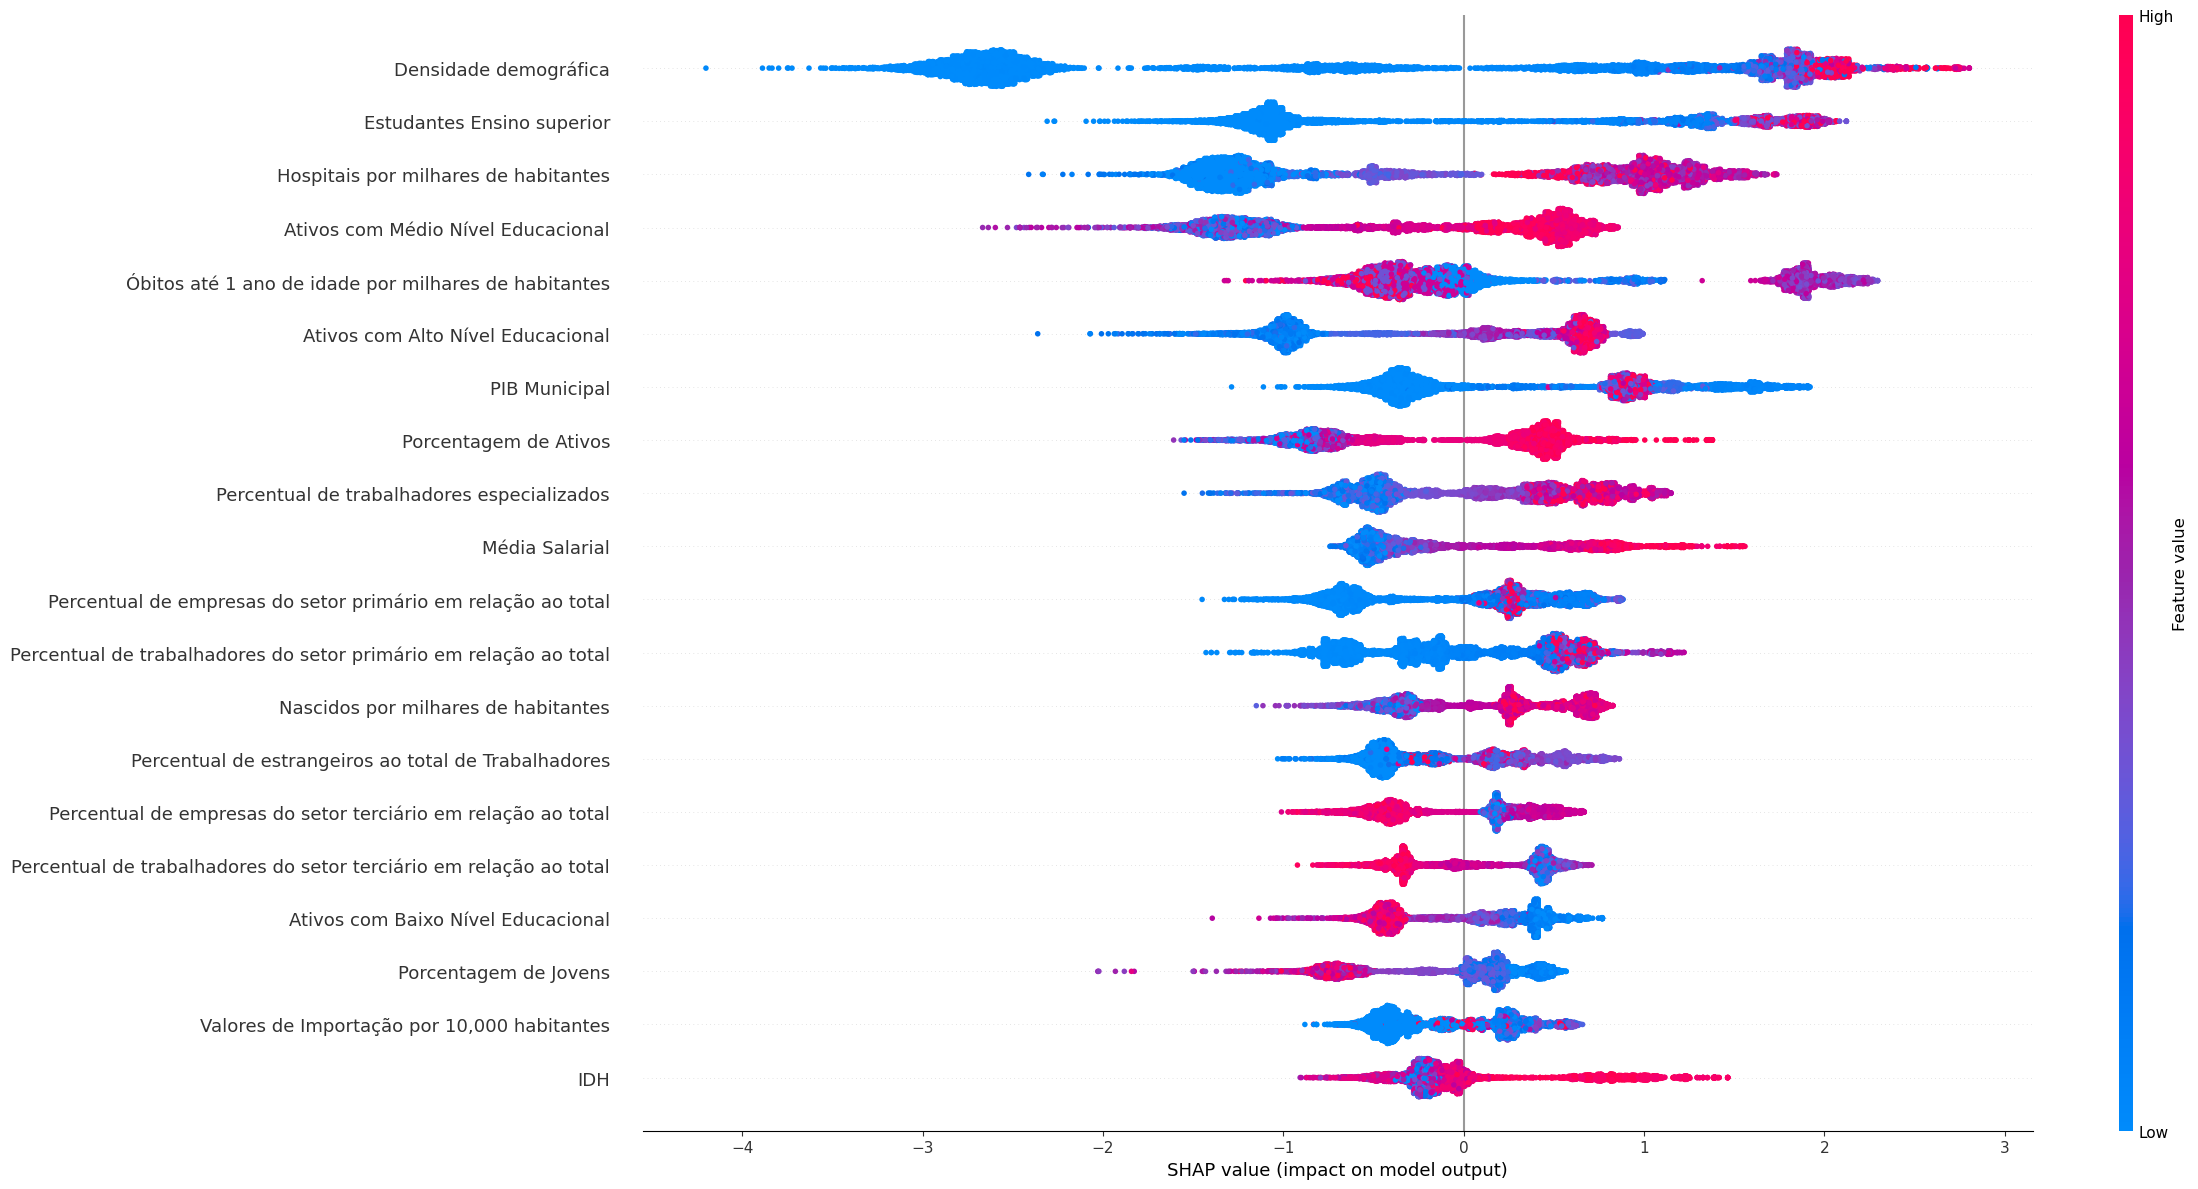

In [22]:
# Usar SHAP para explicar o modelo
import shap

# Criando o objeto que vai calcular os SHAP values
explainer = shap.TreeExplainer(pipeline)

# Calcule os valores SHAP para uma amostra de seus dados (por exemplo, X_train)
shap_values = explainer.shap_values(X_train)

# Resumo gráfico dos valores SHAP
shap.summary_plot(shap_values, X_train, plot_size=(24, 12))

## Resultados do Pipeline de Aprendizado de Máquina

Neste relatório, apresentamos os resultados obtidos a partir do nosso pipeline de aprendizado de máquina.

In [23]:
# Matriz de confusão
y_pred = pipeline.predict(X_test)

matriz_confusao = confusion_matrix(y_test, y_pred)
matriz_confusao

array([[1098,    8],
       [   0, 1106]], dtype=int64)

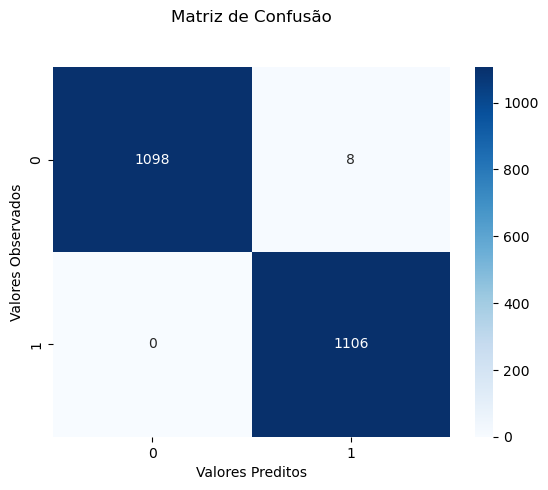

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1106
           1       0.99      1.00      1.00      1106

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212



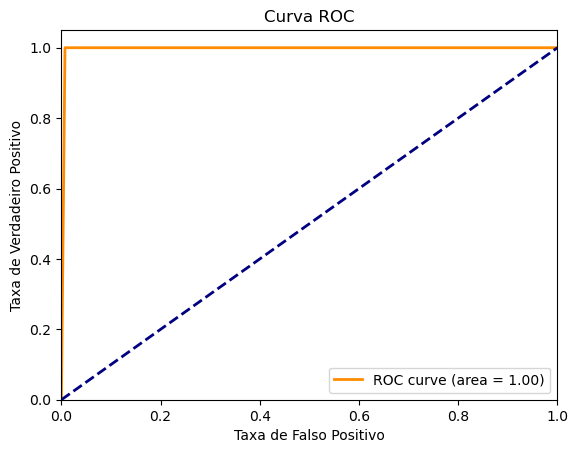

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


# Visualização
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [27]:
class DummyModel(object):

    def __init__(self, y_pred=None, y_prob=None):
        self.y_pred = y_pred
        self.y_prob = y_prob
        self._estimator_type = "classifier"
        self.classes_ = [0, 1]

    def predict(self, X):
        if self.y_pred is None:
            return self.y_pred
        return self.y_pred.values

    def predict_proba(self, X):
        if self.y_prob is None:
            return self.y_prob
        return self.y_prob.values

In [28]:
from sklearn.metrics import (
    ConfusionMatrixDisplay as plot_mdc, 
    RocCurveDisplay as plot_roc, 
    classification_report
)

In [29]:
def plot_confusion_matrix(y_true, y_prob, threshold=0.5, fontsize=26, figsize=(10, 10), cmap='Blues',values_format='d', **kwargs):
    original_fontsize = plt.rcParams['font.size']
    plt.rcParams['font.size'] = fontsize
    y_pred = (y_prob >= threshold).astype(int)
    print(classification_report(y_true, y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt=values_format, cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    plt.rcParams['font.size'] = original_fontsize

In [30]:
def plot_roc_curve(y_true, y_prob, figsize=(10, 10), **kwargs):
    return plot_roc(
        estimator=DummyModel(y_prob=y_prob),
        X=None, y=y_true,
        ax=plt.figure(figsize=figsize).gca(),
        **kwargs
    )

In [31]:
def calculate_far_frr(y_prob, y_true, n_points=30, normalize=False, threshold=None):
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_prob[y_true == 0] >= t
        frr_pt = y_prob[y_true == 1] <= t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold
    return {
        'optm': optm,
        'plot': pd.DataFrame(
            index=thr,
            data={
                'far': far,
                'frr': frr,
            },
            dtype=float
        )
    }

In [32]:
def plot_far_frr(figsize=(15,10), grid=True, **kwargs):
    ffdf = calculate_far_frr(**kwargs)
    plt.figure(figsize=figsize)
    ffdf['plot']['far'].plot(ax=plt.gca(), c='red')
    ffdf['plot']['frr'].plot(ax=plt.gca(), c='blue')
    plt.axvline(ffdf['optm'], ls='--', color='#333333', label=f'decisão (threshold >= {ffdf["optm"] * 100:5.2f}%)')
    plt.grid(grid)
    plt.xlim(0, 1)
    plt.ylim(0, ffdf['plot'].max().max())
    plt.xlabel('threshold')
    plt.ylabel('count')
    plt.legend()
    return ffdf

In [33]:
def plot_binary_classifier_histogram(y_true, y_prob, dataset_label=None, threshold=None, **kwargs):
    bins = kwargs.get('bins', 8)
    alpha = kwargs.get('alpha', 0.4)
    linewidth = kwargs.get('linewidth', 0)
    figsize = kwargs.get('figsize', (15, 10))
    fontdict = kwargs.get('fontdict', {'size': 12})

    plt.figure(figsize=figsize)
    sns.histplot(
        y_prob[y_true == 0], color='red', label='y==0',
        bins=bins, alpha=alpha, linewidth=linewidth
    )
    sns.histplot(
        y_prob[y_true == 1], color='blue', label='y==1',
        bins=bins, alpha=alpha, linewidth=linewidth
    )
    if threshold is not None:
        plt.axvline(0.5, ls='--', color='#333333', label=f'decisão (threshold >= {threshold * 100:5.2f}%)')
    plt.xlabel('Probabilidade', fontdict={'size': 12})
    plt.ylabel('Contagem', fontdict={'size': 12})
    if dataset_label is not None:
        dataset_label = f' - {dataset_label}'
    plt.title(f'Estimativas {dataset_label}', fontdict={'size': 12})
    plt.grid(True)
    plt.legend()

In [34]:
X = X_train
y_true = y_train.flatten()
y = pd.DataFrame(
    dict(
        y_true=y_true,
        y_pred=pipeline.predict(X),
        y_prob=pipeline.predict_proba(X)[:, 1]
    ),
    index=X.index    
)

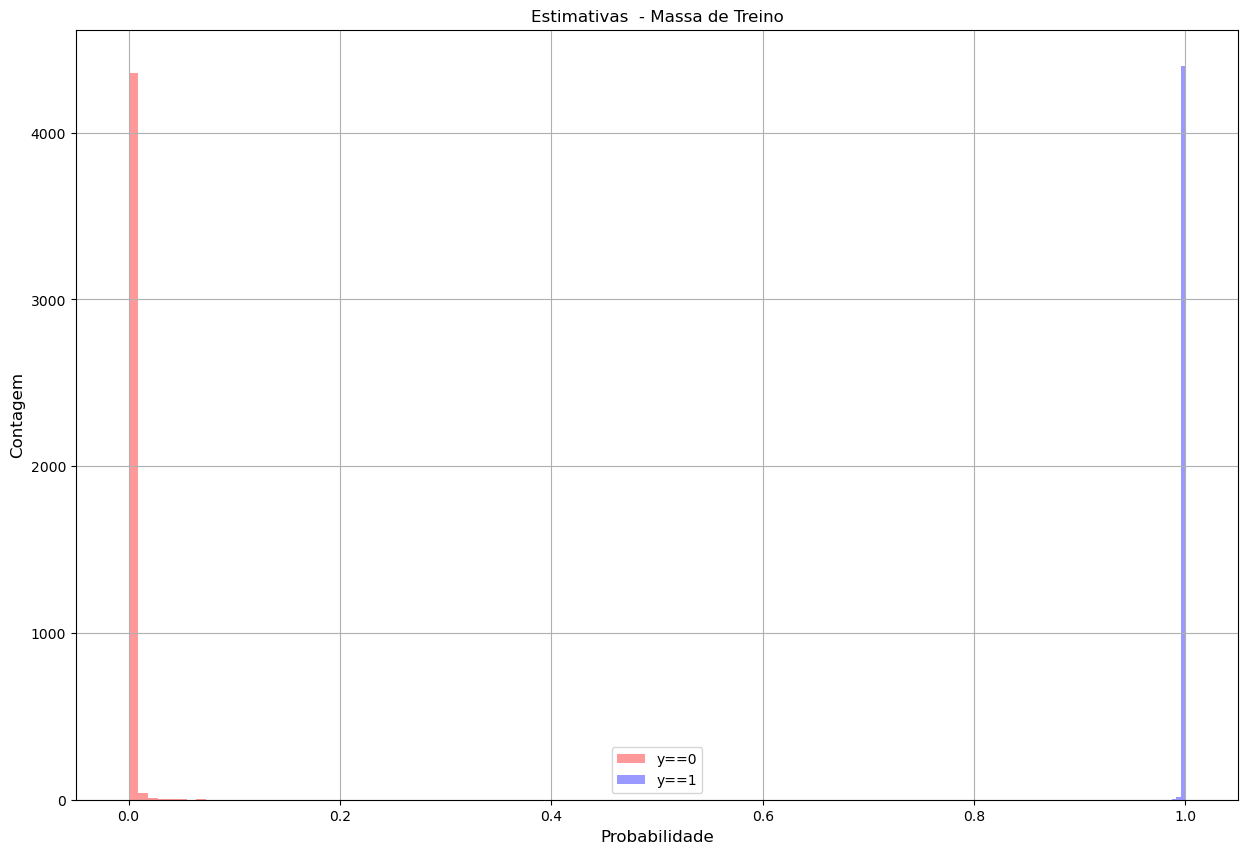

In [35]:
plot_binary_classifier_histogram(
    y_true=y.y_true, y_prob=y.y_prob, dataset_label='Massa de Treino', 
    bins=8, alpha=0.4, linewidth=0, grid=True,
    figsize=(15, 10)
)

0.10344827586206896

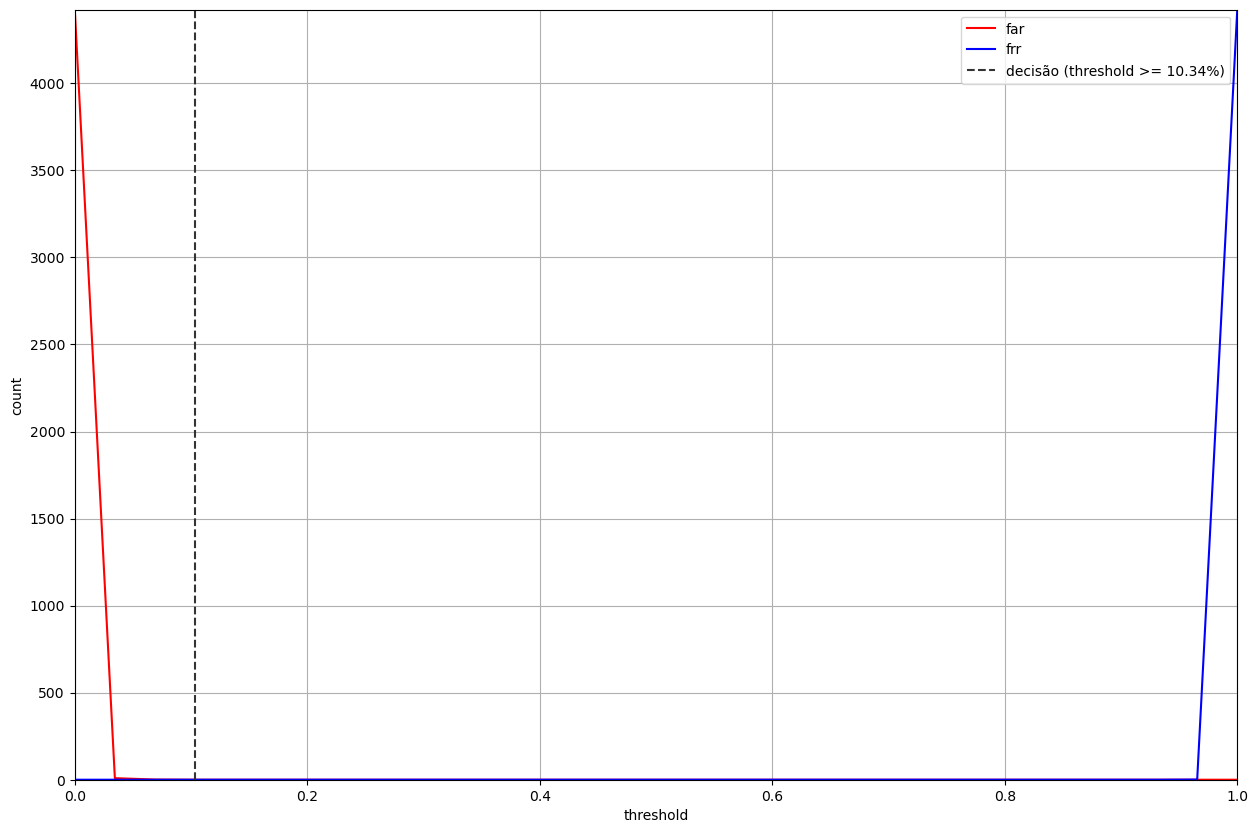

In [36]:
ffdf = plot_far_frr(
    y_true=y.y_true, y_prob=y.y_prob, 
    n_points=30, normalize=False, threshold=None, 
    figsize=(15, 10)
)
ffdf['optm']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4423
           1       1.00      1.00      1.00      4423

    accuracy                           1.00      8846
   macro avg       1.00      1.00      1.00      8846
weighted avg       1.00      1.00      1.00      8846



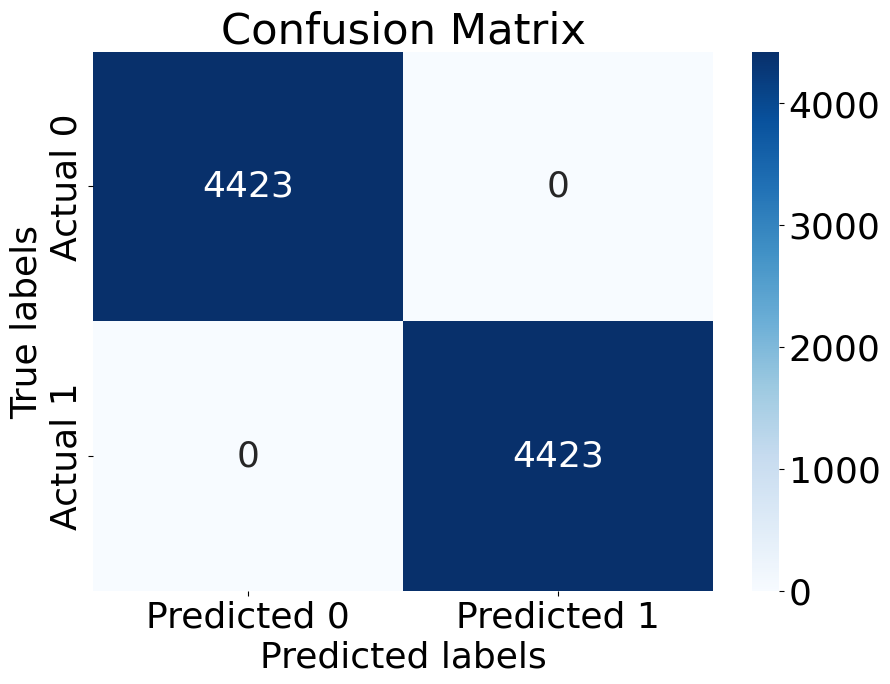

In [37]:
plot_confusion_matrix(
    y_true=y.y_true, y_prob=y.y_prob, threshold=0.4, 
    fontsize=26, values_format='d'
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4423
           1       1.00      1.00      1.00      4423

    accuracy                           1.00      8846
   macro avg       1.00      1.00      1.00      8846
weighted avg       1.00      1.00      1.00      8846



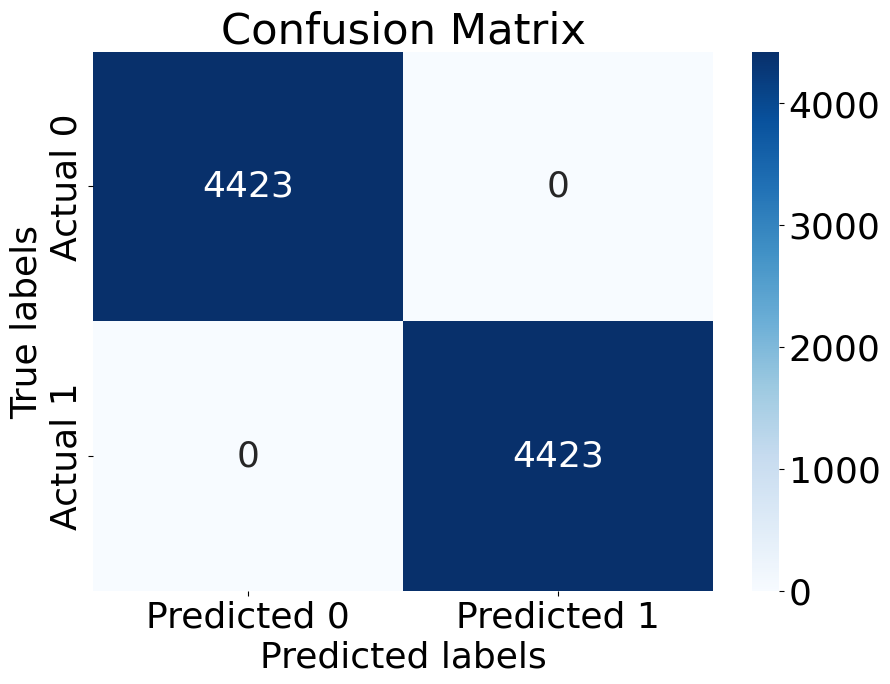

In [38]:
plot_confusion_matrix(
    y_true=y.y_true, y_prob=y.y_prob, threshold=ffdf['optm'], 
    fontsize=26, values_format='d'
)

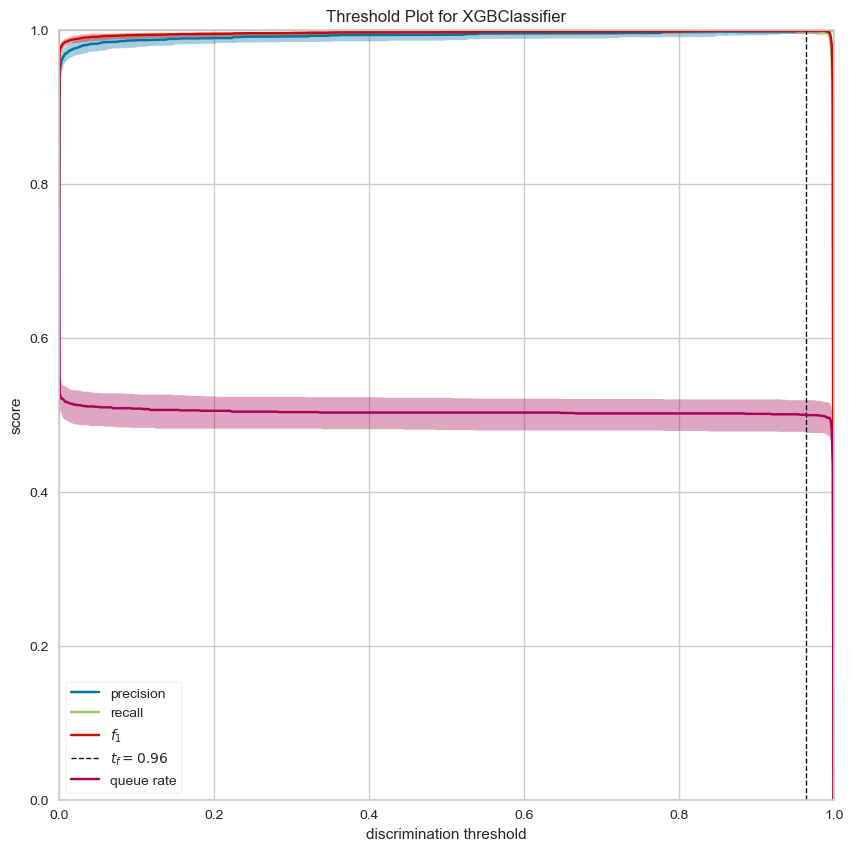

In [39]:
from yellowbrick.classifier.threshold import discrimination_threshold

f = plt.figure(figsize=(10, 10))
dt = discrimination_threshold(pipeline, X_train, y_train,n_trials=100, show=False)

### Avaliação em dados de teste

In [40]:
X = X_test
y_true = y_test.flatten()
y = pd.DataFrame(
    dict(
        y_true=y_true,
        y_pred=pipeline.predict(X),
        y_prob=pipeline.predict_proba(X)[:, 1]
    ),
    index=X.index    
)

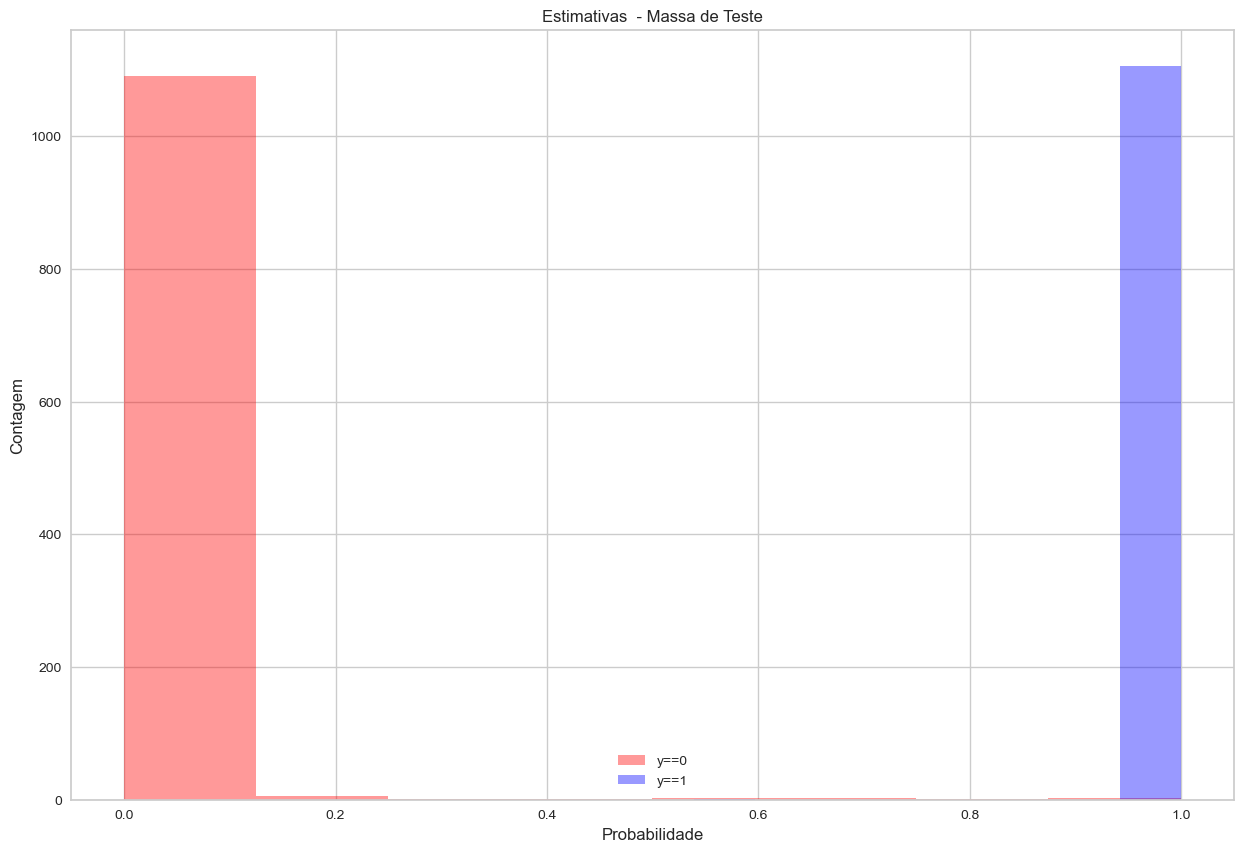

In [41]:
plot_binary_classifier_histogram(
    y_true=y.y_true, y_prob=y.y_prob, dataset_label='Massa de Teste', 
    bins=8, alpha=0.4, linewidth=0, grid=True,
    figsize=(15, 10)
)

0.9393939393939394

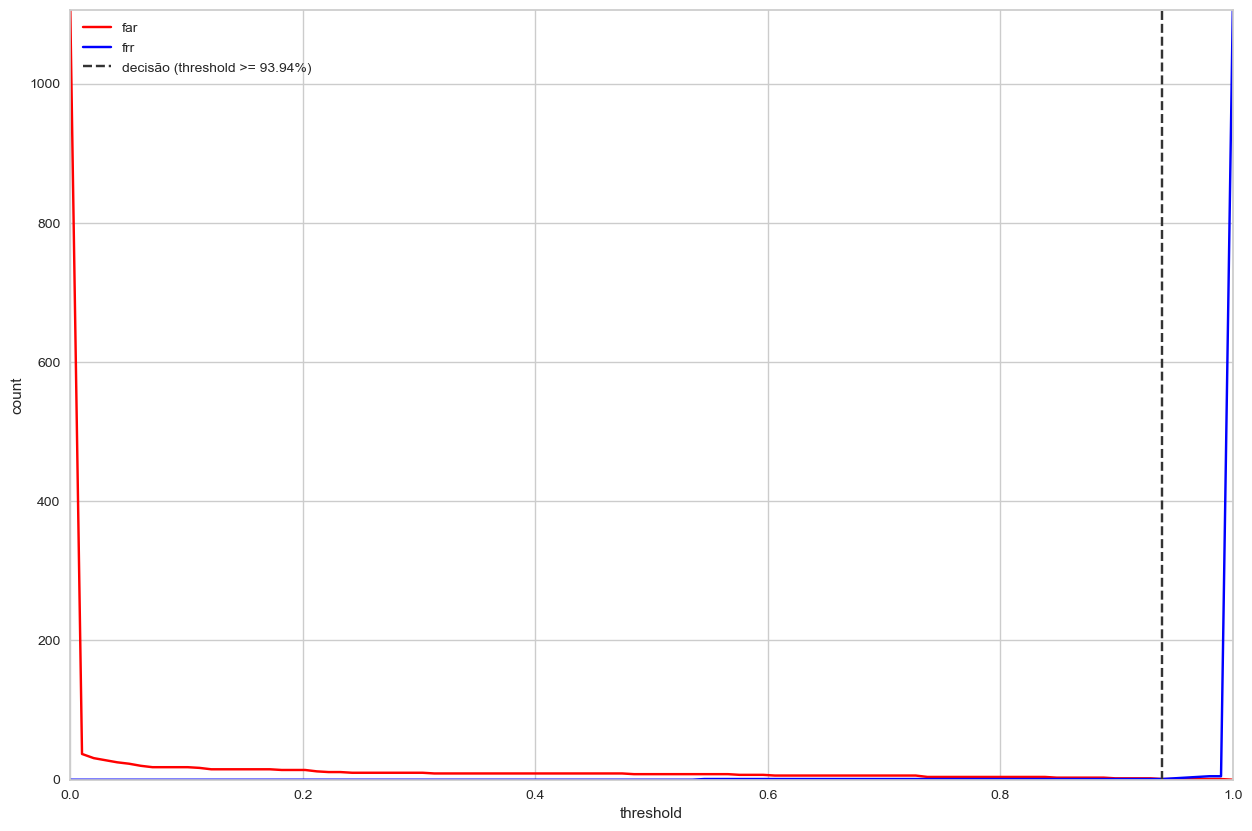

In [42]:
ffdf = plot_far_frr(
    y_true=y.y_true, y_prob=y.y_prob, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
ffdf['optm']

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1106
           1       0.99      1.00      1.00      1106

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212



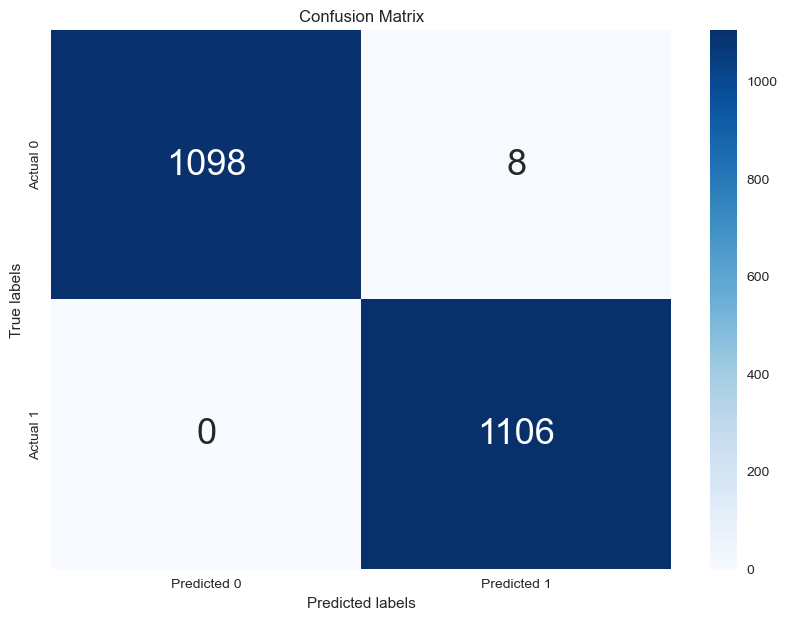

In [43]:
plot_confusion_matrix(
    y_true=y.y_true, y_prob=y.y_prob, threshold=0.5, 
    fontsize=26, values_format='d'
)

In [44]:
#novo_dataset = df_merged[df_merged['Cidade tem Aluno']=='Não']  # Dados sem a coluna alvo

novo_dataset = df_merged.copy()

In [45]:
# Predizendo a probabilidade de cada cidade ser uma boa candidata para buscar alunos
# 'predict_proba' retorna a probabilidade para cada classe. Como estamos interessados na classe positiva (1),
# pegamos a segunda coluna com [:, 1]
novo_dataset['Probabilidade'] = pipeline.predict_proba(novo_dataset.drop(['Cidade tem Aluno','quantidade de alunos','nomeLocalidade', 'estado'], axis=1))[:, 1]

In [46]:
# Ordenando o dataset com base na probabilidade prevista
# Assim, cidades com maior probabilidade de serem bons locais para buscar alunos são colocadas no topo
cidades_prioritarias = novo_dataset.sort_values(by='Probabilidade', ascending=False)

In [47]:
# Exibindo o nome da localidade, estado e a probabilidade correspondente para cada cidade
cidades_prioritarias[['nomeLocalidade', 'estado', 'Probabilidade']].head(10)

,nomeLocalidade,estado,Probabilidade
4814,campinas,São Paulo,0.999803
2877,curitiba,Paraná,0.999547
4501,florianópolis,Santa Catarina,0.999522
5270,são paulo,São Paulo,0.999441
1629,belo horizonte,Minas Gerais,0.999428
803,brasília,Distrito Federal,0.999254
976,goiânia,Goiás,0.999178
3314,recife,Pernambuco,0.999014
4174,porto alegre,Rio Grande do Sul,0.998806
4440,balneário camboriú,Santa Catarina,0.998680


In [48]:
#exportando para csv o dataset com as cidades prioritárias como UTF-8 separado por ponto e virgula e decimais com virgula

cidades_prioritarias[['nomeLocalidade', 'estado', 'Cidade tem Aluno','Probabilidade']].to_csv('cidades_prioritarias_XGB.csv', sep=';', decimal=',', encoding='utf-8' , index=False)

In [49]:
X = novo_dataset.drop(['Cidade tem Aluno','quantidade de alunos','nomeLocalidade', 'estado', 'Probabilidade'], axis=1)

Cidade com a maior probabilidade de ter alunos: campinas


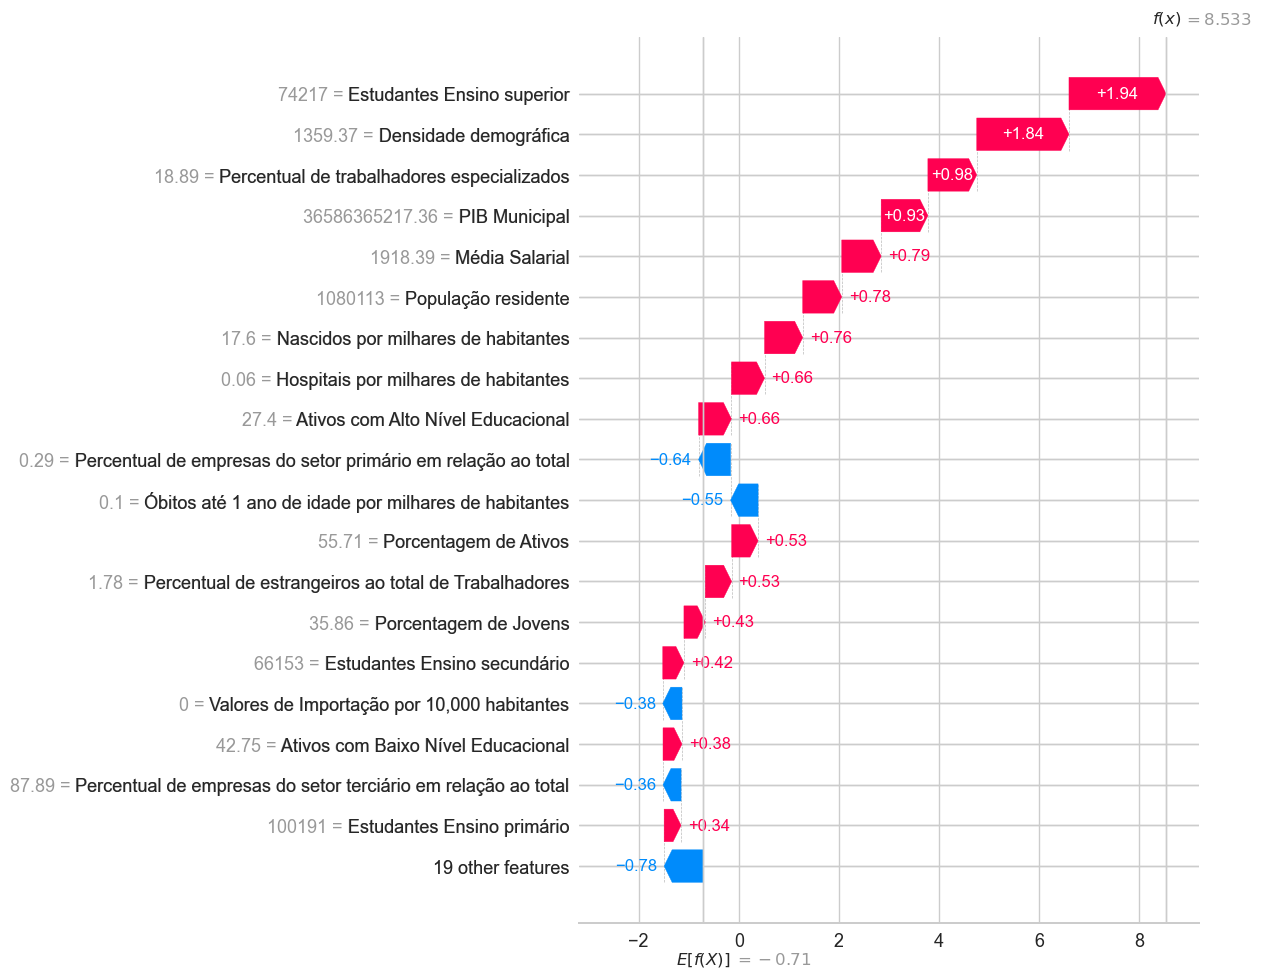

In [56]:
# Supondo que você tenha X e y como seus dados e modelo como seu modelo treinado
proba = pipeline.predict_proba(X)[:, 1]
index_max_proba = proba.argmax()  # encontra o índice da entrada com a maior probabilidade

cidade_max_proba = df.iloc[index_max_proba]['nomeLocalidade']
print(f"Cidade com a maior probabilidade de ter alunos: {cidade_max_proba}")

# Inicialize o explainer do SHAP
explainer = shap.Explainer(pipeline)
shap_values = explainer.shap_values(X)

# Obtenha os valores SHAP para a entrada de maior probabilidade
shap_value_for_max_proba = shap_values[index_max_proba]

# Obter a explicação para a entrada com a maior probabilidade
explanation_for_max_proba = explainer(X.iloc[[index_max_proba]])

# Visualização da explicação
shap.plots.waterfall(explanation_for_max_proba[0], max_display=20)

Cidade: curitiba


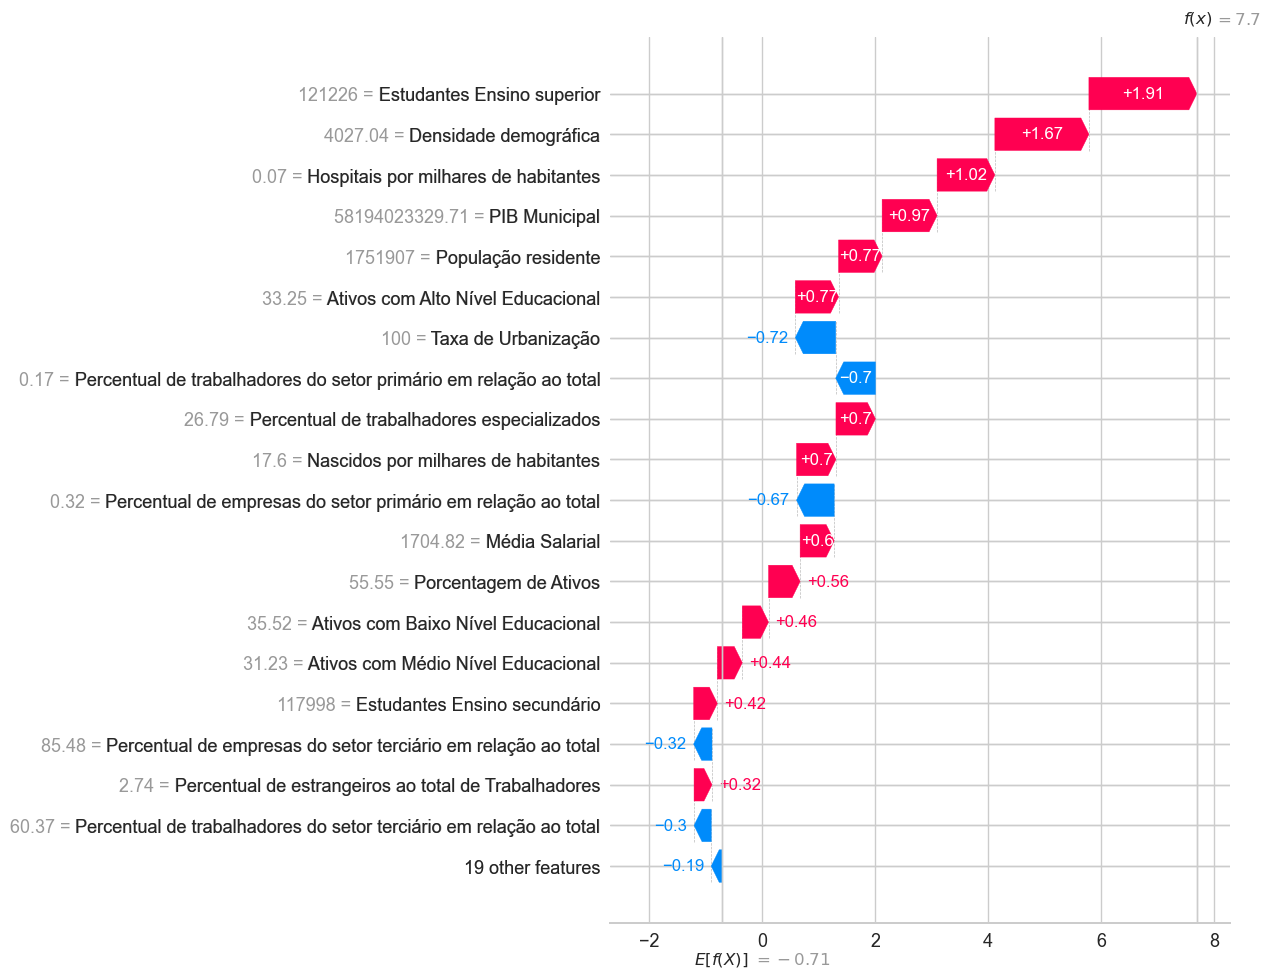

Cidade: araras


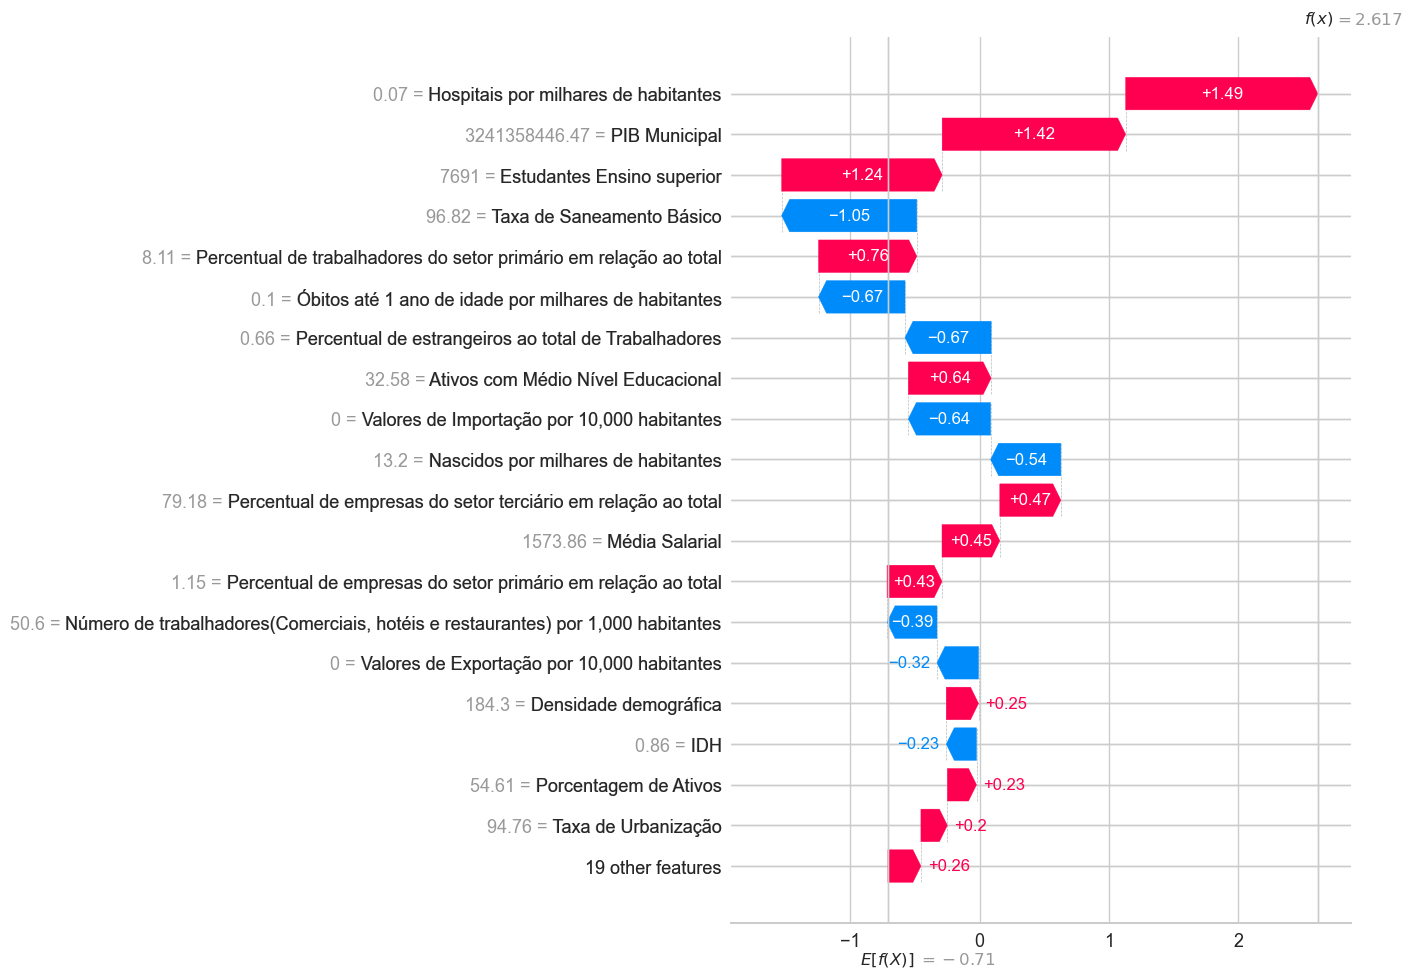

Cidade: salvador


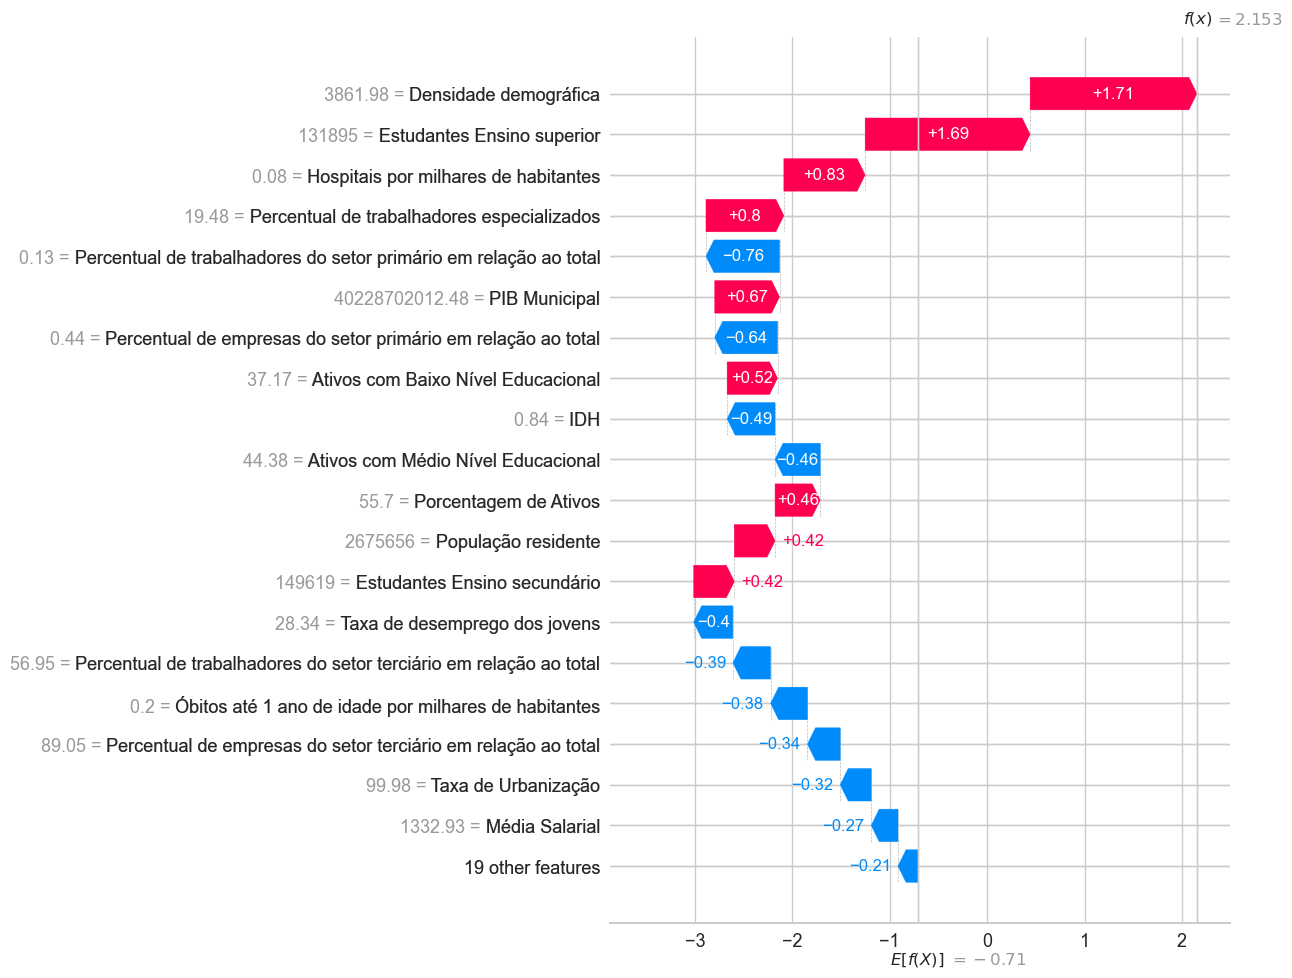

Cidade: taubaté


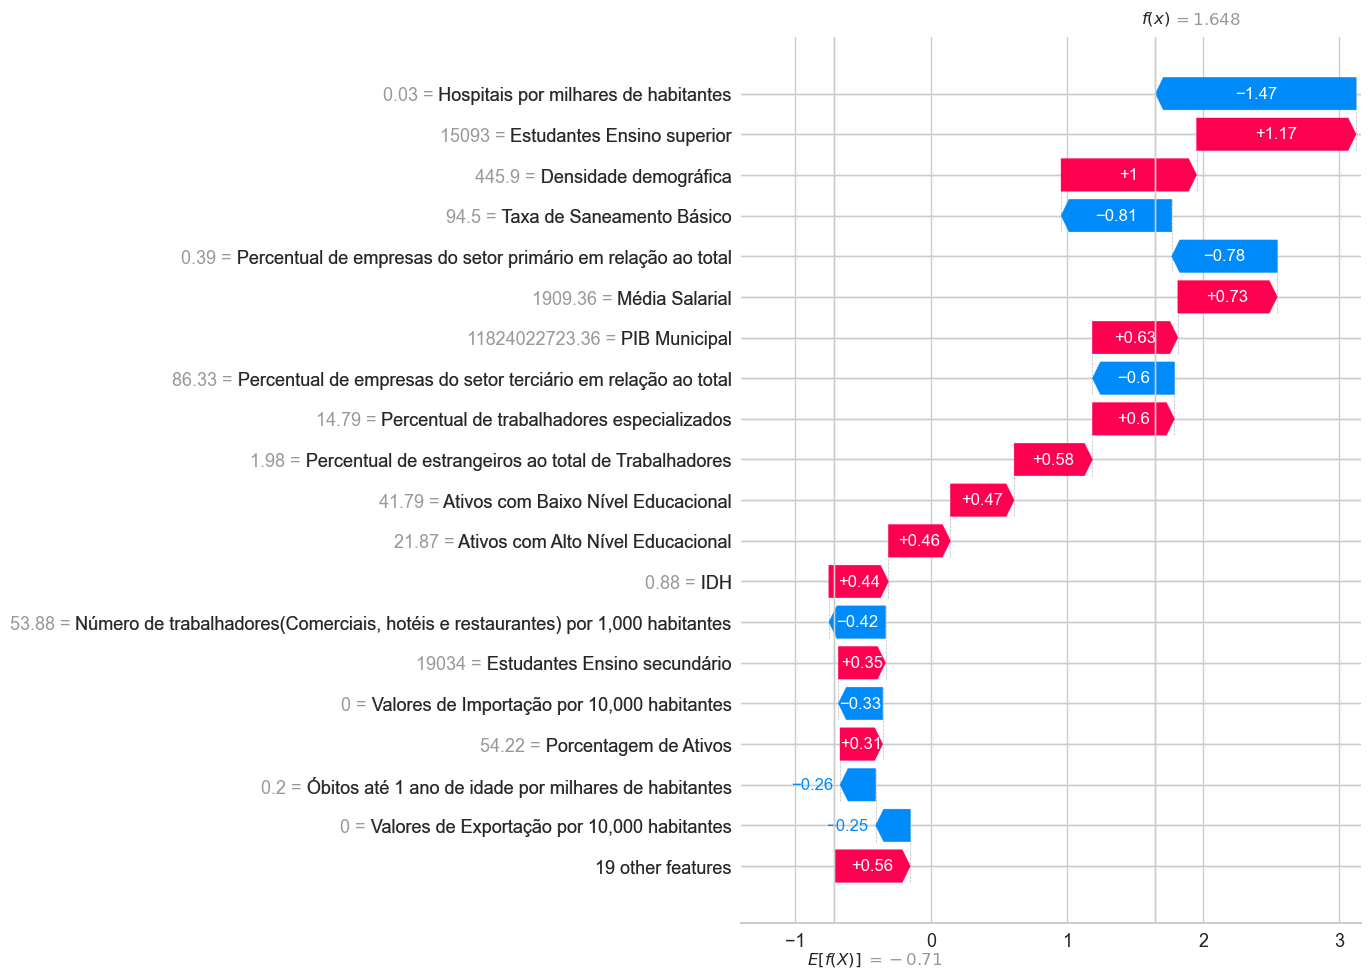

Cidade: varginha


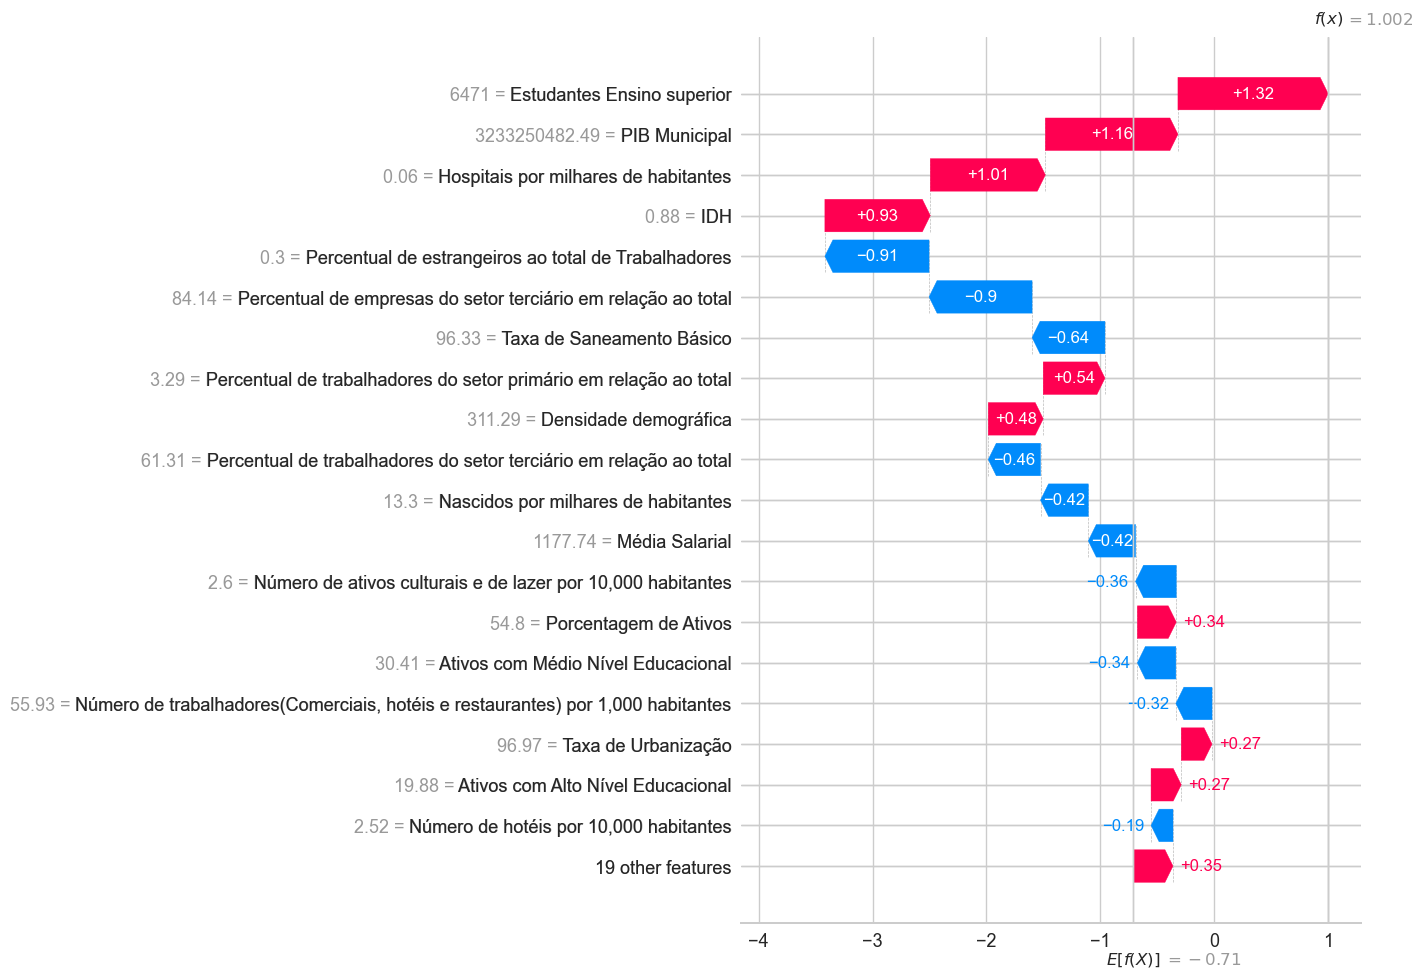

In [ ]:
# 1. Filtrando o novo dataset
mask = novo_dataset['Cidade tem Aluno'] == 'Não'
df_no_alunos = novo_dataset[mask]

# Dropando as colunas desnecessárias
columns_to_drop = ['Cidade tem Aluno', 'quantidade de alunos', 'nomeLocalidade', 'estado', 'Probabilidade']
X_no_alunos = df_no_alunos.drop(columns_to_drop, axis=1)

# Probabilidades preditas para cidades sem alunos
proba_no_alunos = pipeline.predict_proba(X_no_alunos)[:, 1]

# 2. Identificando as 5 cidades com as maiores probabilidades
indices_top5_probas = proba_no_alunos.argsort()[-5:][::-1]
cidades_top5_probas = df_no_alunos.iloc[indices_top5_probas]['nomeLocalidade']

# 3. Explicando a probabilidade para cada uma das 5 cidades
for index, cidade in zip(indices_top5_probas, cidades_top5_probas):
    print(f"Cidade: {cidade}")
    explanation = explainer(X_no_alunos.iloc[[index]])
    shap.plots.waterfall(explanation[0], max_display=20)
    plt.show()

In [ ]:
# Se você já criou um Explainer e obteve os SHAP values:
shap_values = explainer.shap_values(X)

shap_df = pd.DataFrame(shap_values, columns=X.columns)

cidades_with_shap = pd.concat([cidades_prioritarias[['nomeLocalidade', 'estado', 'Cidade tem Aluno', 'Probabilidade']], shap_df], axis=1)

cidades_with_shap.to_csv('cidades_prioritarias_XGB_with_SHAP.csv', sep=';', decimal=',', encoding='utf-8', index=False)